In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Data/2022-2023 Football Player Stats.csv', delimiter=';', index_col='Player', encoding='latin1')
df


,Rk,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
Player,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,1,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
Yunis Abdelhamid,2,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
Himad Abdelli,3,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
Salis Abdul Samed,4,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
Laurent Abergel,5,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Szymon ?urkowski,2685,POL,MF,Fiorentina,Serie A,25,1997,2,0,32,...,0.00,2.50,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
Szymon ?urkowski,2686,POL,MF,Spezia,Serie A,25,1997,1,0,8,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
Martin Ødegaard,2687,NOR,MF,Arsenal,Premier League,24,1998,20,20,1684,...,0.05,2.51,0.70,0.0,0.0,0.00,5.19,0.48,0.70,40.9


In [5]:
df.drop(columns=['Rk', 'Born'], inplace=True)
df

,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
Player,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,20,19,1596,17.7,1,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,22,22,1980,22.0,0,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,14,8,770,8.6,0,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,20,20,1799,20.0,1,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,15,15,1165,12.9,0,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,2,0,32,0.4,0,...,0.00,2.50,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1,0,8,0.1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,20,20,1684,18.7,8,...,0.05,2.51,0.70,0.0,0.0,0.00,5.19,0.48,0.70,40.9


In [6]:
print(df.info())
print(df.columns)
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2689 entries, Brenden Aaronson to Filip ?uri?i?
Columns: 121 entries, Nation to AerWon%
dtypes: float64(112), int64(5), object(4)
memory usage: 2.5+ MB
None
Index(['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s',
       'Goals',
       ...
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost', 'AerWon%'],
      dtype='object', length=121)
               Age           MP       Starts          Min          90s  \
count  2689.000000  2689.000000  2689.000000  2689.000000  2689.000000   
mean     26.011157    11.833023     8.476013   760.451097     8.450465   
std       4.446259     6.864278     6.994383   591.094260     6.567484   
min      15.000000     1.000000     0.000000     1.000000     0.000000   
25%      23.000000     5.000000     2.000000   194.000000     2.200000   
50%      26.000000    13.000000     7.000000   684.000000     7.600000   
75%      29.000000    18.000000    14.0

In [7]:
df_limpio = df.dropna()

print('Imprimir la cantidad de filas antes y después de la limpieza')
print(f"Número de filas antes de la limpieza: {len(df)}")
print(f"Número de filas después de la limpieza: {len(df_limpio)}")


Imprimir la cantidad de filas antes y después de la limpieza
Número de filas antes de la limpieza: 2689
Número de filas después de la limpieza: 2688


Posiciones y número de observaciones:
DF: 825
MF: 608
FW: 408
FWMF: 244
MFFW: 208
GK: 164
DFMF: 101
MFDF: 62
DFFW: 38
FWDF: 30


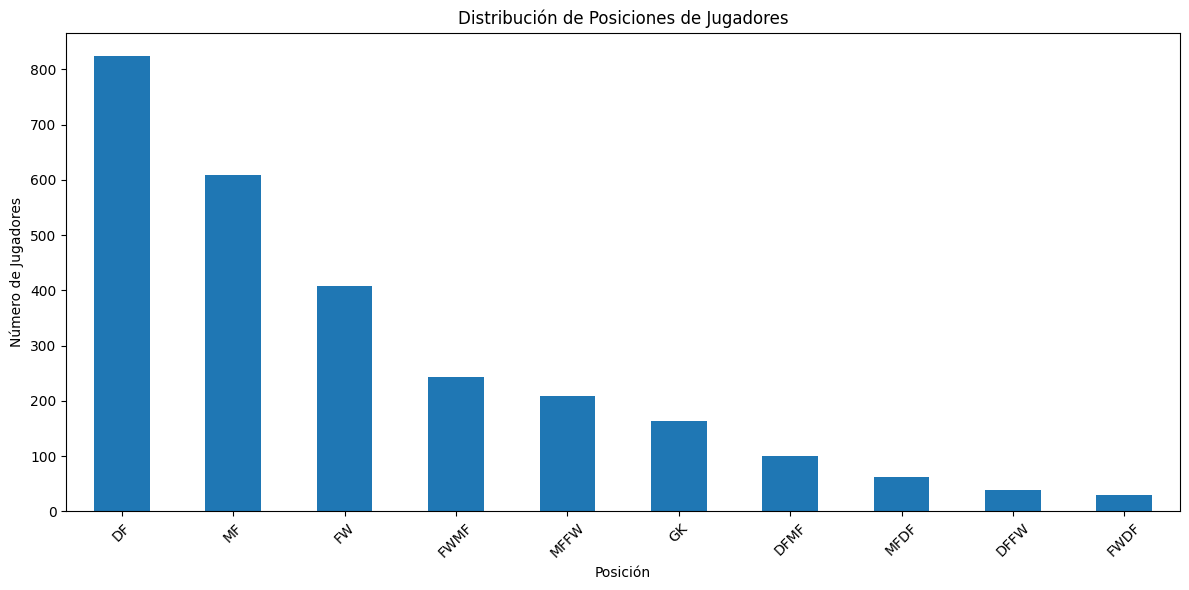

In [8]:

def contar_posiciones(dataframe):
    conteo_posiciones = dataframe['Pos'].value_counts()
    print("Posiciones y número de observaciones:")
    for posicion, conteo in conteo_posiciones.items():
        print(f"{posicion}: {conteo}")
    return conteo_posiciones

plt.figure(figsize=(12, 6))
conteo_pos = contar_posiciones(df_limpio)
conteo_pos.plot(kind='bar')
plt.title('Distribución de Posiciones de Jugadores')
plt.xlabel('Posición')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/j6/s68ysphd2330y28yn3687q9r0000gn/T/ipykernel_13093/3737684979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Pos'] = df_limpio['Pos'].apply(simplificar_posiciones)


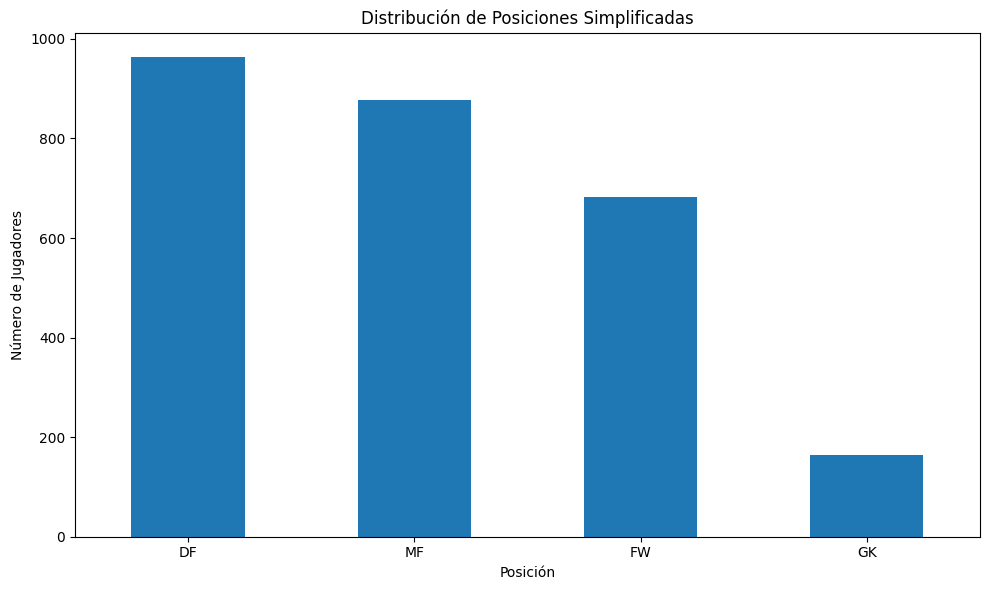

In [9]:
def simplificar_posiciones(posicion):
    equivalencias = {
        'DF': 'DF', 'MF': 'MF', 'FW': 'FW', 'GK': 'GK',
        'FWMF': 'FW', 'MFFW': 'MF', 'MFDF': 'MF',
        'DFMF': 'DF', 'DFFW': 'DF', 'FWDF': 'FW'
    }
    return equivalencias.get(posicion, posicion)
df_limpio['Pos'] = df_limpio['Pos'].apply(simplificar_posiciones)

plt.figure(figsize=(10, 6))
df_limpio['Pos'].value_counts().plot(kind='bar')
plt.title('Distribución de Posiciones Simplificadas')
plt.xlabel('Posición')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
df = df_limpio
df

,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
Player,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,USA,MF,Leeds United,Premier League,22,20,19,1596,17.7,1,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,22,22,1980,22.0,0,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
Himad Abdelli,FRA,MF,Angers,Ligue 1,23,14,8,770,8.6,0,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,20,20,1799,20.0,1,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,15,15,1165,12.9,0,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,2,0,32,0.4,0,...,0.00,2.50,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1,0,8,0.1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,20,20,1684,18.7,8,...,0.05,2.51,0.70,0.0,0.0,0.00,5.19,0.48,0.70,40.9


In [11]:
nombre_archivo = 'dataset_futbol_limpio_1.0.csv'
df.to_csv(nombre_archivo)
print(f"El dataset ha sido guardado como '{nombre_archivo}'")


El dataset ha sido guardado como 'dataset_futbol_limpio_1.0.csv'
